Nexon EV

In [ ]:
import pandas as pd

In [ ]:
data_nexon = pd.concat(map(pd.read_csv, ['/content/Tata_nexon.csv', '/content/Tata_nexon_2.csv']))

In [ ]:
data_nexon.head()

,Unnamed: 0,Heading,Review,Read_more,Time,User,Date,comment,share
0,0,Amazing Nexon Ev,Amazing car for daily usage please plan the ch...,Read More,18 days ago | Rakshith B R,NaN,NaN,NaN,NaN
1,1,300 km range vs 400 km range.,"After driving Nexon EV for a few times, i feel...",Read More,2 months ago | David,NaN,NaN,NaN,NaN
2,2,Great Car,Really very Amazing experience.Just loved that...,Read More,4 months ago | Ruthik,NaN,NaN,NaN,NaN
3,3,Tata nexon EV review,Yes you can go for electric vehicle because it...,Read More,5 months ago | Pitho hansda,NaN,NaN,NaN,NaN
4,4,Good car,Good car with good safety and comfort with all...,Read More,6 months ago | Puni,NaN,NaN,NaN,NaN


In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def clean_stopwords_shortwords(w):
    stopwords_list=stopwords.words('english')
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words) 

#Combined function that will be called to preprocess our text data
def preprocess_sentence(w):
    #lowercase all the text
    w = w.lower()
    #Remove puntuations
    w = re.sub(r'[^\w\s]', '', w)
    w = re.sub(r"([?.!,¿])", r" ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    #Calling stopword function
    w=clean_stopwords_shortwords(w)
    return w

In [ ]:
data_nexon['Preprocessed_Review']=data_nexon['Review'].map(preprocess_sentence)

In [ ]:
data_nexon.head()

,Unnamed: 0,Heading,Review,Read_more,Time,User,Date,comment,share,Preprocessed_Review
0,0,Amazing Nexon Ev,Amazing car for daily usage please plan the ch...,Read More,18 days ago | Rakshith B R,NaN,NaN,NaN,NaN,amazing car daily usage please plan charging s...
1,1,300 km range vs 400 km range.,"After driving Nexon EV for a few times, i feel...",Read More,2 months ago | David,NaN,NaN,NaN,NaN,driving nexon times feel much factors really m...
2,2,Great Car,Really very Amazing experience.Just loved that...,Read More,4 months ago | Ruthik,NaN,NaN,NaN,NaN,really amazing experiencejust loved carso beau...
3,3,Tata nexon EV review,Yes you can go for electric vehicle because it...,Read More,5 months ago | Pitho hansda,NaN,NaN,NaN,NaN,yes electric vehicle good average running back...
4,4,Good car,Good car with good safety and comfort with all...,Read More,6 months ago | Puni,NaN,NaN,NaN,NaN,good car good safety comfort options


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Battery = data_nexon.Preprocessed_Review.str.split(expand=True).stack().value_counts().battery
Range = data_nexon.Preprocessed_Review.str.split(expand=True).stack().value_counts().range
Power = data_nexon.Preprocessed_Review.str.split(expand=True).stack().value_counts().power
Performance = data_nexon.Preprocessed_Review.str.split(expand=True).stack().value_counts().performance
comfort = data_nexon.Preprocessed_Review.str.split(expand=True).stack().value_counts().comfort
space = data_nexon.Preprocessed_Review.str.split(expand=True).stack().value_counts().space
Mileage = data_nexon.Preprocessed_Review.str.split(expand=True).stack().value_counts().mileage 
design = data_nexon.Preprocessed_Review.str.split(expand=True).stack().value_counts().design  

In [ ]:
res=[]
attributes = ['range', 'battery', 'power', 'performance', 'comfort', 'space', 'mileage', 'design']
for attri in attributes:
  print(attri)
  for review in data_nexon['Review']:
    review = re.compile('[.?!]').split(review)
    for i in review:
      if attri in i:
        res.append(i)
  print(res)
      #nexon = re.compile('[.?!]').split(i)
      #print(nexon)   


range
[' Tata should lower the Nexon price and increase market share Tata Punch EV - 5-8 Lakhs Tata Nexon EV 300 km range - 8-10 Lakhs Tata Nexon EV 400 km range - 10-15 Lakhs Because, the affordability in lower range and availability in mid-range is important optional swappable range extender batteries would become a super hit like partnering with swappable battery stations', 'Need to increase mileage, battery capacity so range also increases, other features are good', ' It gives me a range of 200-220 km on full AC', ' If i use it in city and highways I get a range of 170-180 km if used strictly in city and small lanes with average speed not going above 30kms', ' Approximate range according to my driving with AC ,music system etc always switched on', " It can't be only car to own due to under developing charging infrastructure and insufficient range", 'The best electronic car in India in this price range obsolete use of money Tata nexon is my favourite car because I love electronic ca

In [ ]:
with open("/content/nexon.txt", "r") as file_handle:
  df = pd.DataFrame(file_handle.readlines())

# Save Dataframe to CSV
df.to_csv("nexon.csv", header='ReviewText')

In [ ]:
nexd=pd.read_csv('/content/nexon.csv')
nexd.head()

,Unnamed: 0,Text
0,0,Tata should lower the Nexon price and increase...
1,1,"Need to increase mileage, battery capacity so ..."
2,2,It gives me a range of 200-220 km on full AC\n
3,3,If i use it in city and highways I get a rang...
4,4,Approximate range according to my driving wit...


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
def calculate_sentiment(review):
  text = TextBlob(review)
  return text.sentiment.polarity

In [ ]:
nexd['Sentiment_Score']=nexd['Text'].map(calculate_sentiment)
nexd.head()
nexd.Sentiment_Score.describe()

count    34.000000
mean      0.232125
std       0.333597
min      -0.437500
25%       0.000000
50%       0.228704
75%       0.442750
max       1.000000
Name: Sentiment_Score, dtype: float64

In [ ]:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"



In [ ]:
nexd['Sentiment']=nexd['Sentiment_Score'].map(getAnalysis)
nexd.head()

,Unnamed: 0,Text,Sentiment_Score,Sentiment
0,0,Tata should lower the Nexon price and increase...,0.366667,Positive
1,1,"Need to increase mileage, battery capacity so ...",0.287500,Positive
2,2,It gives me a range of 200-220 km on full AC\n,0.350000,Positive
3,3,If i use it in city and highways I get a rang...,-0.133333,Negative
4,4,Approximate range according to my driving wit...,-0.400000,Negative


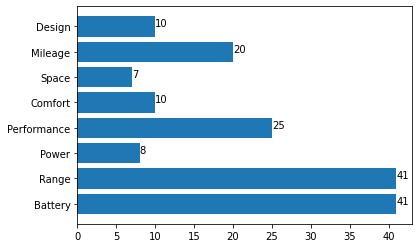

In [ ]:
x = ['Battery', 'Range', 'Power', 'Performance', 'Comfort', 'Space', 'Mileage', 'Design']
y = [Battery, Range, Power, Performance, comfort, space, Mileage, design]
plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

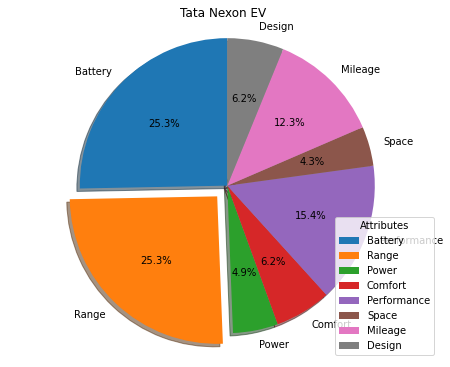

In [ ]:
labels = ['Battery', 'Range', 'Power', 'Comfort', 'Performance', 'Space', 'Mileage', 'Design']
x = [Battery, Range, Power, comfort, Performance, space, Mileage, design]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0,0.1,0,0,0,0,0,0], shadow=True, startangle=90)
plt.title('Tata Nexon EV')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

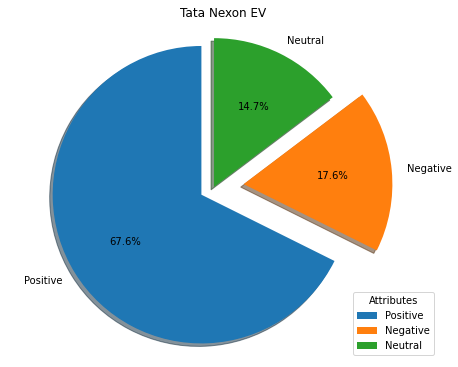

In [ ]:
Positive = nexd.Sentiment.str.split(expand=True).stack().value_counts().Positive
Negative = nexd.Sentiment.str.split(expand=True).stack().value_counts().Negative
Neutral = nexd.Sentiment.str.split(expand=True).stack().value_counts().Neutral

labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0], shadow=True, startangle=90)
plt.title('Tata Nexon EV')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Kona Electric

In [ ]:
data_kona = pd.concat(map(pd.read_csv, ['/content/kona-electric.csv', '/content/kona_electric_2.csv']))

In [ ]:
data_kona['Preprocessed_Review']=data_kona['Review'].map(preprocess_sentence)

In [ ]:
Battery = data_kona.Preprocessed_Review.str.split(expand=True).stack().value_counts().battery
Range = data_kona.Preprocessed_Review.str.split(expand=True).stack().value_counts().range
Power = data_kona.Preprocessed_Review.str.split(expand=True).stack().value_counts().power
Performance = data_kona.Preprocessed_Review.str.split(expand=True).stack().value_counts().performance
comfort = data_kona.Preprocessed_Review.str.split(expand=True).stack().value_counts().comfort
space = data_kona.Preprocessed_Review.str.split(expand=True).stack().value_counts().space
Mileage = data_kona.Preprocessed_Review.str.split(expand=True).stack().value_counts().mileage 
design = data_kona.Preprocessed_Review.str.split(expand=True).stack().value_counts().design 

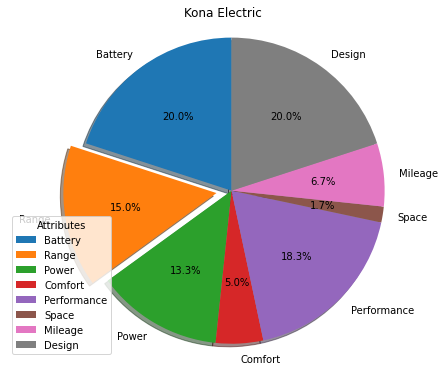

In [ ]:
labels = ['Battery', 'Range', 'Power', 'Comfort', 'Performance', 'Space', 'Mileage', 'Design']
x = [Battery, Range, Power, comfort, Performance, space, Mileage, design]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0,0.1,0,0,0,0,0,0], shadow=True, startangle=90)
plt.title('Kona Electric')
plt.legend(title="Attributes", loc="lower left")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
f = open('kona2.txt', 'w')
for review in data_kona['Review']:
  review = re.compile('[.?!]').split(review)
  for i in review:
    if 'range' in i:
      f.write(i)
      print(type(i))
      print(i)

<class 'str'>
Pretty good car, smooth as a glider fast car, instant pickup and the range in one charge is also pretty good as well, so we can go more miles, a catchy car grab our eye balls everyone wants to ride this
<class 'str'>
This car is a perfect, modern and stylish car one thing I like about the car it's is long-range and is safe and it so eye-catching a man just cross the road just to ask which Hyundai car is this lastly I love this car I hope you do thanks for your time
<class 'str'>
 And I greatly appreciate Hyundai's innovation in bringing electric cars but the price for this is too much and even if the gst gets reduced it will come about 20l but there are many competitors in that range except for the electric transmission
<class 'str'>
One of the best EV car available in India with very good range
<class 'str'>
 The price is also the best according to the standards of the car and such a long range drive in one charge
<class 'str'>
 Real-life range of 330km on a full charge


In [ ]:
f = open('kona2.txt', 'w')

In [ ]:
ls

kona2.csv  kona_electric_2.csv  mgzs.csv        mgzs.txt   sample_data/
kona2.txt  kona-electric.csv    mg_zs_ev_2.csv  nexon.csv  Tata_nexon_2.csv
kona.csv   kona.txt             mg_zs_ev.csv    nexon.txt  Tata_nexon.csv


In [ ]:
f.write("This is the write command")
f.write("It allows us to write in a particular file")
f.close()

In [ ]:
file = open('kona2.txt', 'r')
# This will print every line one by one in the file
for each in file:
    print (each)

This is the write commandIt allows us to write in a particular filee range in one charge is also pretty good as well, so we can go more miles, a catchy car grab our eye balls everyone wants to ride thisThis car is a perfect, modern and stylish car one thing I like about the car it's is long-range and is safe and it so eye-catching a man just cross the road just to ask which Hyundai car is this lastly I love this car I hope you do thanks for your time And I greatly appreciate Hyundai's innovation in bringing electric cars but the price for this is too much and even if the gst gets reduced it will come about 20l but there are many competitors in that range except for the electric transmissionOne of the best EV car available in India with very good range The price is also the best according to the standards of the car and such a long range drive in one charge Real-life range of 330km on a full charge Make more products like these in a good range of price which is affordable for allThe car

In [ ]:
with open("/content/kona2.txt", "r") as file_handle:
  df = pd.DataFrame(file_handle.readlines())

# Save Dataframe to CSV
df.columns = ['Text']
df.to_csv("/content/kona2.csv", header='ReviewText')

In [ ]:
konad=pd.read_csv('kona.csv')
konad.head()

,Text
0,"Pretty good car, smooth as a glider fast car, ..."
1,"This car is a perfect, modern and stylish car ..."
2,And I greatly appreciate Hyundai's innovation...
3,Make more products like these in a good range...
4,poor range


In [ ]:
konad['Sentiment_Score']=konad['Text'].map(calculate_sentiment)
konad.head()
konad.Sentiment_Score.describe()

count    5.000000
mean     0.293968
std      0.398737
min     -0.400000
25%      0.355556
50%      0.414286
75%      0.500000
max      0.600000
Name: Sentiment_Score, dtype: float64

In [ ]:
konad['Sentiment']=konad['Sentiment_Score'].map(getAnalysis)
konad.head()

,Text,Sentiment_Score,Sentiment
0,"Pretty good car, smooth as a glider fast car, ...",0.355556,Positive
1,"This car is a perfect, modern and stylish car ...",0.414286,Positive
2,And I greatly appreciate Hyundai's innovation...,0.500000,Positive
3,Make more products like these in a good range...,0.600000,Positive
4,poor range,-0.400000,Negative


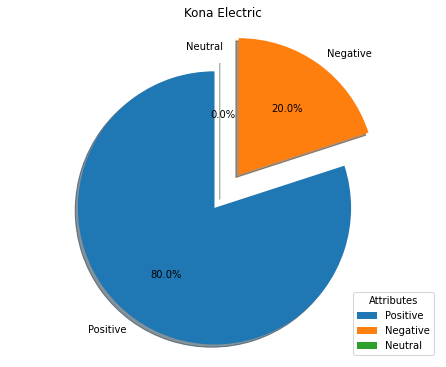

In [ ]:
Positive = konad.Sentiment.str.split(expand=True).stack().value_counts().Positive
Negative = konad.Sentiment.str.split(expand=True).stack().value_counts().Negative
Neutral =0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0], shadow=True, startangle=90)
plt.title('Kona Electric', fontsize=20)
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

MG ZS EV

In [ ]:
data_mg = pd.concat(map(pd.read_csv, ['/content/mg_zs_ev.csv', '/content/mg_zs_ev_2.csv']))

In [ ]:
data_mg['Preprocessed_Review']=data_mg['Review'].map(preprocess_sentence)

In [ ]:
Range = data_mg.Preprocessed_Review.str.split(expand=True).stack().value_counts().range
Power = data_mg.Preprocessed_Review.str.split(expand=True).stack().value_counts().power
Performance = data_mg.Preprocessed_Review.str.split(expand=True).stack().value_counts().performance
comfort = data_mg.Preprocessed_Review.str.split(expand=True).stack().value_counts().comfort
Mileage = data_mg.Preprocessed_Review.str.split(expand=True).stack().value_counts().mileage 
design = data_mg.Preprocessed_Review.str.split(expand=True).stack().value_counts().design 

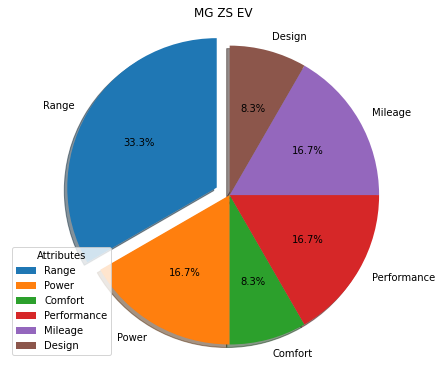

In [ ]:
labels = ['Range', 'Power', 'Comfort', 'Performance', 'Mileage', 'Design']
x = [Range, Power, comfort, Performance, Mileage, design]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1,0,0,0,0,0], shadow=True, startangle=90)
plt.title('MG ZS EV')
plt.legend(title="Attributes", loc="lower left")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6) 
plt.show()

In [ ]:
for review in data_mg['Review']:
  review = re.compile('[.?!]').split(review)
  for i in review:
    if 'range' in i:
      print(i)

ZS EV is one of the premium EVs in India, with more efficiency and reliability than any other EVs in India at an affordable range
In terms of driving performance and range, This will be the most preferable choice and i'm very much opted towards the upliftment of e-mobility, So considering that, Mg zs ev 2022 will be a perfect choice
Orange car in india launch date on 2022, 6 seater better car, Automatic
 And looking at EV cars it is the best mid-range model EV
Outstanding features with great driving range
Outstanding features with great driving range


In [ ]:
with open("/content/mgzs.txt", "r") as file_handle:
  df = pd.DataFrame(file_handle.readlines())

# Save Dataframe to CSV
df.to_csv("/content/mgzs.csv", header='ReviewText')

In [ ]:
mgdata = pd.read_csv('mgzs.csv')
mgdata.head()

,Text
0,"ZS EV is one of the premium EVs in India, with..."
1,"In terms of driving performance and range, Thi..."
2,"Orange car in india launch date on 2022, 6 sea..."
3,And looking at EV cars it is the best mid-ran...
4,Outstanding features with great driving range


In [ ]:
mgdata['Sentiment_Score']=mgdata['Text'].map(calculate_sentiment)
mgdata.head()
mgdata.Sentiment_Score.describe()

count    5.000000
mean     0.584833
std      0.292269
min      0.187500
25%      0.500000
50%      0.586667
75%      0.650000
max      1.000000
Name: Sentiment_Score, dtype: float64

In [ ]:
mgdata['Sentiment']=mgdata['Sentiment_Score'].map(getAnalysis)
mgdata.head()

,Text,Sentiment_Score,Sentiment
0,"ZS EV is one of the premium EVs in India, with...",0.187500,Positive
1,"In terms of driving performance and range, Thi...",0.586667,Positive
2,"Orange car in india launch date on 2022, 6 sea...",0.500000,Positive
3,And looking at EV cars it is the best mid-ran...,1.000000,Positive
4,Outstanding features with great driving range,0.650000,Positive


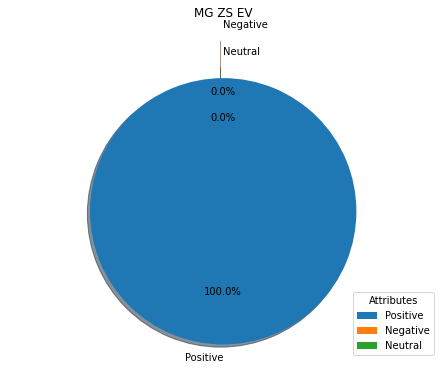

In [ ]:
Positive = mgdata.Sentiment.str.split(expand=True).stack().value_counts().Positive
Negative = 0
Neutral = 0

labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0], shadow=True, startangle=90)
plt.title('MG ZS EV')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Predict sentiment

In [ ]:
text = input("enter review: ")
score = TextBlob(text).sentiment.polarity
print(getAnalysis(score))

enter review: Car i really good
Positive
